<a href="https://colab.research.google.com/github/KjelleJ/enkla-ai-experiment/blob/main/AIX_2_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Vektorrum
---
En vektor kan ses som en punkt eller en "pil" (med storlek och riktning) i ett vektorrum.
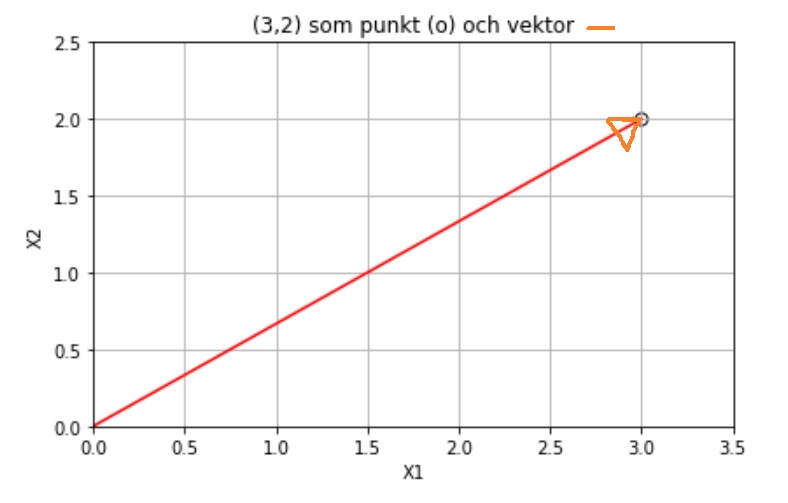




---

## Addition och subtraktion av vektorer


---



In [ ]:
# addition och subtraktion av 2d-vektorer
import numpy as np
a = np.array([3, 2])
b = np.array([1, 1])
print(a.shape)
print('a =', a)
print('b =', b)
c = a + b
d = a - b
print('a+b =', c)
print('a-b =', d)

---
# Word embedding
---
Embeddings (inbäddningar) är ett viktigt begrepp inom AI. En embedding är en representation (i form av en **vektor**) av något t.ex. ett ord, en mening, ett dolument, en bild osv. Embeddings tränas fram med hjälp av AI-modeller. Vi ska titta på en "word embedding" där ett ord (semantiken) representeras av en vektor.

För vår embedding **glove-wiki-gigaword-50** gäller:


*   Bara engelska ord
*   Små bokstäver




In [ ]:
!pip install --upgrade gensim

In [ ]:
# DU MÅSTE NU STARTA OM SESSIONEN: Körning->Starta om sessionen
# Troligtvis problem med olika Python-versioner

In [ ]:
# Färdigtränade modeller för Gensim
import gensim
import gensim.downloader

In [ ]:
# Info om den embedding vi ska använda: glove-wiki-gigaword-50!
# glove-wiki-gigaword-100 ger något bättre värden men tar en stund att ladda ner.
gensim.downloader.info("glove-wiki-gigaword-50")

In [ ]:
# Ladda ner vår embedding
# wv - word vectors
wv = gensim.downloader.load('glove-wiki-gigaword-50')


### Varje ord representeras av en 50d vektor

In [ ]:
# Varje ord representeras av en vektor med 50 värden
vector = wv['boy']
print(vector.shape)
vector

In [ ]:
# Vad händer om ogiltigt ord?
vector = wv['pojke']

### Likheter

In [ ]:
# Beräkna likheten (cosine similarity) mellan två ord
print("boy", "boy", wv.similarity("boy", "boy"))
print("boy", "girl", wv.similarity("boy", "girl"))
print("boy", "man", wv.similarity("boy", "man"))
print("boy", "woman", wv.similarity("boy", "woman"))
print("boy", "dog", wv.similarity("boy", "dog"))
print("boy", "bucket", wv.similarity("boy", "bucket"))

In [ ]:
# Beräkna likheten (cosine similarity) mellan två ord
print("fight", "battle", wv.similarity("fight", "battle"))
print("fight", "love", wv.similarity("fight", "love"))
print("fight", "bucket", wv.similarity("fight", "bucket"))

In [ ]:
# Vilka ord liknar mest "twitter"?
wv.most_similar(["twitter"])

In [ ]:
# Vilka ord liknar mest "volvo"?
wv.most_similar("volvo", topn=5)

In [ ]:
wv.most_similar("beautiful", topn=10)

In [ ]:
# Hitta det mest avvikande ordet
wv.doesnt_match(("boy", "girl", "man", "woman", "king", "queen", "bucket"))

### "Genus" vektor

In [ ]:
# Topp 3 mest liknande ord
# Kan tolkas som: (queen - woman) + man dvs king
wv.most_similar(positive=["queen", "man"], negative=["woman"], topn=3)

In [ ]:
# Det här funkar inte lika bra (som man skulle kunna tro)
wv.most_similar(wv["queen"] - wv["woman"] + wv["man"],topn=3)

In [ ]:
# Bara topp-ordet
# Kan tolkas som: (queen - woman) + man dvs king
wv.most_similar(positive=["queen", "man"], negative=["woman"], topn=1)

In [ ]:
word = wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print(word[0][0])

In [ ]:
wv.most_similar(positive=["prince", "girl"], negative=["boy"], topn=1)

### "Pluralis" vektor

In [ ]:
# pluralis
wv.most_similar(positive=["girls", "boy"], negative=["girl"], topn=1)

In [ ]:
wv.most_similar(positive=["women", "man"], negative=["woman"], topn=1)

In [ ]:
wv.most_similar(positive=["children", "bucket"], negative=["child"], topn=1)

In [ ]:
# Ibland blir det fel...
# Testa med andra ord i stället för "elk"
wv.most_similar(positive=["children", "elk"], negative=["child"], topn=3)

In [ ]:
# Ibland blir det fel...
wv.most_similar(positive=["children", "woman"], negative=["child"], topn=3)

### "Huvudstads" vektor

In [ ]:
wv.most_similar(positive=["paris", "britain"], negative=["france"], topn=1)

In [ ]:
wv.most_similar(positive=["berlin", "india"], negative=["germany"], topn=1)

In [ ]:
wv.most_similar(positive=["stockholm", "norway"], negative=["sweden"], topn=1)

---
# Visualisering
---
Våra ord-vektorer är 50d. Den värld vi lever i är 3d. Vi måste minska antalet dimensioner för att kunna visualisera. För att kunna plotta i 2d (planet) omvandlar vi vektorerna från 50d till 2d med hjälp av PCA. Då kan vi se att "liknande" ord samlas i kluster.

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

words = ["boy", "girl", "king", "queen", "prince", "princess", "man", "woman", "volvo", "bmw"]

X = wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate("  " + word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

words = ["boy", "boys", "girl", "girls", "king", "queen", "prince", "princess", "man", "woman"]

X = wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate("  " + word, xy=(result[i, 0], result[i, 1]))
pyplot.show()